In [113]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
from math import e
j = cmath.sqrt(-1)

In [3]:
#operator definitionis
N=2
si = qeye(2)
sx = 0.5*sigmax()
sy = 0.5*sigmay()
sz = 0.5*sigmaz()

In [399]:
#make list of tensor products
sx_list = []
sy_list = []
sz_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sx
    sx_list.append(tensor(op_list))

    op_list[n] = sy
    sy_list.append(tensor(op_list))

    op_list[n] = sz
    sz_list.append(tensor(op_list))

In [400]:
#construct Hamiltonian
B = 0
A0 = 1
H = B*sz_list[0] 
for n in range(N-1):
    H += A0*sz_list[0]*sz_list[n+1] + A0*sx_list[0]*sx_list[n+1] + A0*sy_list[0]*sy_list[n+1]
print(H)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]


In [401]:
#Find eigenvalues and eigenvectors
ebasis = H.eigenstates()[1]
eng = H.eigenstates()[0]

In [404]:
#Create initial state
#Define spin up as 0 and spin down as 1, with the index the position of the particle
spin = np.full(N,0)
spin[1] = 1
index = 0
for i in range(N):
    index += 2**(i)*spin[N-1-i]
allup = basis(2**N,0)
#Create state in tensor product basis
psi0 = basis(2**N,index)
psi0

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

In [405]:
#Evolution
steps = 50
times = np.linspace(0,7)
result = sesolve(H, psi0, times, [sz_list[0]])

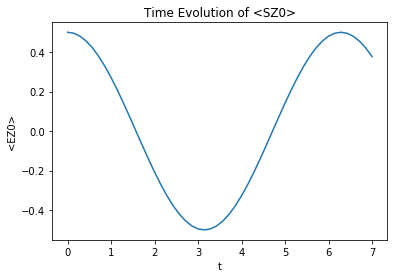

In [406]:
plt.plot(times, result.expect[0])
plt.title('Time Evolution of <SZ0>')
plt.ylabel("<EZ0>")
plt.xlabel("t")
plt.show()

In [407]:
#given N finds values of s (highest weight) and ms
s = (N-1)/2
m = -s
ms = [m]
for i in range(N):
    if m < s:
        m = m + 1
        ms.append(m)
print("s:",s)
print("ms:",ms)

s: 0.5
ms: [-0.5, 0.5]


In [408]:
#function to give eigenvectors of the 2by2 block for a given s and m (take lowest value of m)
def generalBlock(s,m):
    g = math.sqrt(s*(s+1)-m*(m+1))
    BlockGen = np.array([[0.5*B + 0.5*A0*m, 0.5*A0*g],[0.5*A0*g,-0.5*B - 0.5*A0*(m+1)]])
    Block = Qobj(BlockGen)
    return Block.eigenstates()

In [409]:
#Make list of eigenvalues in order of |j,mj> basis
E = []
numStates = int(2*(2*s+1))
for i in range(numStates):
        if i%2:
            E.append(generalBlock(s,s)[0][1])
        else:
            E.append(generalBlock(s,s)[0][0])
E[0] = generalBlock(s,s)[0][1]
E[numStates-1] = generalBlock(s,s)[0][1]

#list of Coefficients of |s,ms,s0> for each |j,mj>
coefAllUp = Qobj([[0],[1]])
coefAllDown = Qobj([[1],[0]])
Coef = [coefAllUp] 
for i in range(len(ms)-1): 
    x = len(ms)-2-i
    Coef.append(generalBlock(s,ms[x])[1][1]) 
    Coef.append(generalBlock(s,ms[x])[1][0]) 
Coef.append(coefAllDown)
print("Energy Eigenvalues: \n", E)
print("|j,mj> Coefficients: \n", (Coef))

Energy Eigenvalues: 
 [0.25, 0.25, -0.75, 0.25]
|j,mj> Coefficients: 
 [Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]]


In [411]:
#Initial State (in |s,ms,s0> basis)
#basis labeled by |s,s,up>, |s,s-1,up>, |s,s,down>, |s,s-2,up, .. |s,-s,down>
psi0 = basis(numStates,1)
psi0 #is state |s,s-1,up>

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

In [412]:
#Change of basis matrix
ChangeEl = np.zeros((numStates,numStates), dtype=complex)
ChangeEl[0][0] = 1
ChangeEl[numStates-1][numStates-1] = 1
#assign coeff 
for i in range(numStates-2):
    if i%2 == 0:
        ChangeEl[i+1][i+1] = Coef[i+1][0]
        ChangeEl[i+2][i+1] = Coef[i+2][0]
    if i%2 == 1:
        ChangeEl[i][i+1] = Coef[i][1]
        ChangeEl[i+1][i+1] = Coef[i+1][1]
ChangeOfB = Qobj(ChangeEl)
ChangeOfB

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.          0.          0.          0.        ]
 [ 0.          0.70710678  0.70710678  0.        ]
 [ 0.          0.70710678 -0.70710678  0.        ]
 [ 0.          0.          0.          1.        ]]

In [413]:
#Change initial state to |j,mj> basis
psi0J = ChangeOfB*psi0
psi0J

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]]

In [414]:
#Time Evolution of initial state
steps = 50
tCoeffStep = np.zeros(numStates, dtype=Qobj)
psiT = []
exp = 0
for k in range(steps):
    for i in range(numStates):
        exp = e**(-j*E[i]*times[k])
        tCoeffStep[i] = psi0J[i]*exp
    psiTi = Qobj(tCoeffStep)
    psiT.append(psiTi)

In [415]:
#bra of |psiT>
CpsiT = []
for i in range(steps):
    CpsiTi = psiT[i].dag()
    CpsiT.append(CpsiTi)

In [416]:
#Check normalization
print(CpsiT[2]*psiT[2])

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]


In [417]:
#Define S0z in |s,ms,s0> basis
S0z = np.zeros((numStates,numStates))
S0z[0][0] = 1
S0z[numStates-1][numStates-1] = 1
for i in range(numStates-2):
    if i%2 == 0:
        S0z[i+1][i+1] = 1
    if i%2 == 1:
        S0z[i+1][i+1] = -1
S0zs = Qobj(S0z)
S0zs

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]

In [418]:
#Change S0z to |j,mj> basis
S0zj = ChangeOfB*S0zs*(ChangeOfB.dag())
S0zj

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

In [419]:
#expectation value of SZ0
S0zT = np.zeros(steps, dtype = complex)
for i in range(steps):
    S0zTi = CpsiT[i]*S0zj*psiT[i]
    S0zT[i] = (S0zTi[0][0])
  

C:\Users\aorfi\Anaconda3\envs\qutip-env\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


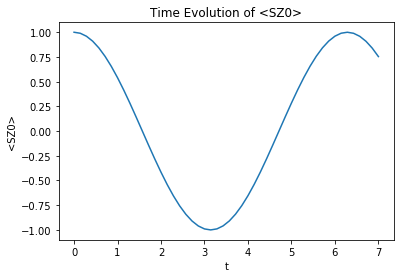

In [420]:
plt.plot(times,S0zT)
plt.title('Time Evolution of <SZ0>')
plt.ylabel("<SZ0>")
plt.xlabel("t")
plt.show()